In [104]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from datetime import datetime

warnings.simplefilter('ignore')

**Single Exponential Smoothing**

In [105]:
# Importing the dataset
data = pd.read_csv('D3.csv')

In [106]:
#Defining Single Exponential Smoothing function ses
def ses(arr,alpha):
    arr1 = [arr[0]]
    for i in range(1, len(arr)):
        arr1.append(alpha * arr[i-1] + (1 - alpha) * arr1[i-1])
    return arr1

In [107]:
#Defining Mean of Squared Error Function mse
def mse(arr1,arr2):
  arr3=[0]
  for i, j in zip(arr1, arr2):
    arr3.append(i-j)
  Sum=0
  for i in arr3:
    sqr=i**2
    Sum+=sqr
  mse=Sum/(len(arr2)-1)
  return mse

In [108]:
#Function to make list of demand with interval 'n'
def dem_n(arr,n):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%n==0:  
      arr1.append(arr[i])
  return arr1

In [109]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [110]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [111]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  2270.985044565901
Mean of Square Errors for alpha = 0.5 is:  1729.8312325136828
Mean of Square Errors for alpha = 0.8 is:  1304.1609035809436


alpha:  0.8


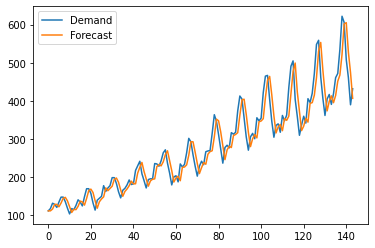

In [112]:
#Comparing mse and plotting for least mse
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

**Double Exponential Smoothing**

In [113]:
#Defining Double Exponential Smoothing function des
def des(arr,alpha,beta):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  arr1.append(a[0]+b[0])
  for i in range(1,len(arr)-1):
      a.append(alpha * arr[i] + (1 - alpha) * (a[i-1]+b[i-1]))
      b.append(beta * (a[i]-a[i-1]) + (1 - beta) * (b[i-1]))        
      arr1.append(a[i]+b[i])
  return arr1

In [114]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [115]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [116]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  3030.8535477527207
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  2544.721808490218
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  1667.7938756614267


alpha:  0.8
beta:  0.9


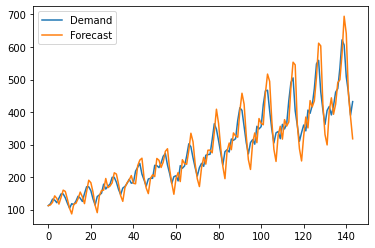

In [117]:
#Comparing mse and plotting for least mse
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

**Triple Exponential Smoothing**

In [118]:
#Defining initial trend
def initial_trend(arr, slen):
    Sum = 0
    for i in range(slen):
        Sum += float(arr[i+slen] - arr[i]) / slen
    return Sum / slen

In [119]:
#Defining initial seasonal
def initial_seasonal(arr, slen):
    arr1 = {}
    s_avg = []
    m = int(len(arr)/slen)
    for j in range(m):
        s_avg.append(sum(arr[slen*j:slen*j+slen])/float(slen))
    for i in range(slen):
        Sum = 0
        for j in range(m):
            Sum += arr[slen*j+i]-s_avg[j]
        arr1[i] = Sum/m
    return arr1

In [120]:
#Defining Triple Exponential Smoothing function tes with interval 'n'
def tes(arr, slen, alpha, beta, gamma, n):
    arr1 = []
    seasonals = initial_seasonal(arr, slen)
    for i in range(len(arr)+n):
        if i == 0:
            smooth = arr[0]
            trend = initial_trend(arr, slen)
            arr1.append(arr[0])
            continue
        if i >= len(arr):
            m = i - len(arr) + 1
            arr1.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = arr[i]
            lsmooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-lsmooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            arr1.append(smooth+trend+seasonals[i%slen])
    return arr1

In [121]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [122]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 12 months here

forecast_d3_tes_1=tes(demand,12,alpha1,beta1,gamma1,0)
forecast_d3_tes_2=tes(demand,12,alpha2,beta2,gamma2,0)
forecast_d3_tes_3=tes(demand,12,alpha3,beta3,gamma3,0)

In [123]:
#Calculating mean of sqaured errors
mse_d3_tes_1=mean_squared_error(demand,forecast_d3_tes_1)
mse_d3_tes_2=mean_squared_error(demand,forecast_d3_tes_2)
mse_d3_tes_3=mean_squared_error(demand,forecast_d3_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d3_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d3_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d3_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  118.90281904729369
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  1407.183862202787
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  471.3980990927143


alpha:  0.2
beta:  0.3
gamma:  0.4


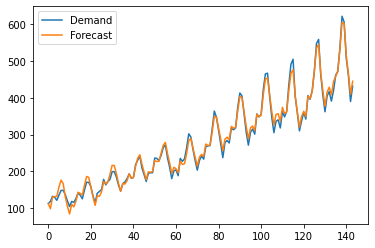

In [124]:
#Comparing mse and plotting for least mse
d3_tes_1={'Demand':demand,'Forecast':forecast_d3_tes_1}
d3_tes_2={'Demand':demand,'Forecast':forecast_d3_tes_2}
d3_tes_3={'Demand':demand,'Forecast':forecast_d3_tes_3}

df1=pd.DataFrame(d3_tes_1)
df2=pd.DataFrame(d3_tes_2)
df3=pd.DataFrame(d3_tes_3)

if mse_d3_tes_1<=mse_d3_tes_2 and mse_d3_tes_1<=mse_d3_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d3_tes_2<=mse_d3_tes_1 and mse_d3_tes_2<=mse_d3_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])



---

---

---







**Applying KPSS and ADF test**

1. ADF test

In [125]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = data[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Passengers')

Results of Dickey-Fuller Test for  Passengers 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


2. KPSS test

In [126]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(atr):
    timeseries = data[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Passengers')

Results of KPSS Test for  Passengers
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


For ADF test, we can see that the p-value  is 0.991880, which is more than 0.05. Thus, from ADF test, we can say that the dataset is non-stationary.

For KPSS test, Test Statistic is more than Critical Values, thus we reject the null hypothesis. Thus, from KPSS test, we can say that the dataset is non-stationary.

Since, both tests conclude that the series is non-stationary, therefore, the dataset is concluded as Not Stationary.



---

---

---







**Prediction for Intervals**

For Single Exponential Smoothening



1. For interval of 1 month

In [127]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [128]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [129]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  2270.985044565901
Mean of Square Errors for alpha = 0.5 is:  1729.8312325136828
Mean of Square Errors for alpha = 0.8 is:  1304.1609035809436


alpha:  0.8


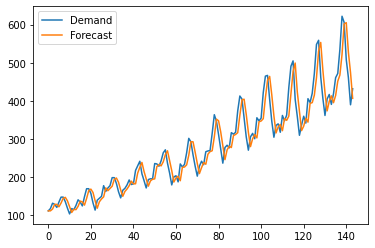

In [130]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

2. For interval of 2 month

In [131]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],2)

In [132]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [133]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  3030.3488762454294
Mean of Square Errors for alpha = 0.5 is:  2978.256495465666
Mean of Square Errors for alpha = 0.8 is:  3168.2476461320452


alpha:  0.5


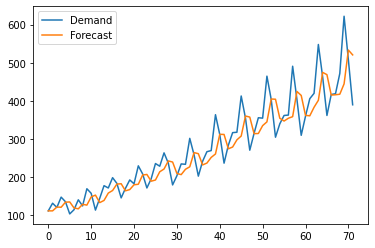

In [134]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

3. For interval of 4 month

In [135]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],4)

In [136]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [137]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  2728.5873951381686
Mean of Square Errors for alpha = 0.5 is:  1077.3844096354696
Mean of Square Errors for alpha = 0.8 is:  1006.344326091061


alpha:  0.8


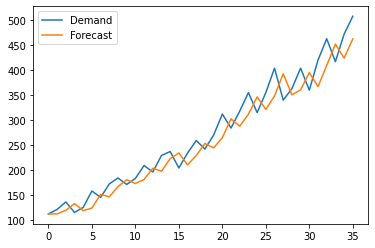

In [138]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

4. For interval of 8 month

In [139]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],8)

In [140]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [141]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  6936.876823000415
Mean of Square Errors for alpha = 0.5 is:  2311.867801730676
Mean of Square Errors for alpha = 0.8 is:  1688.3774810769578


alpha:  0.8


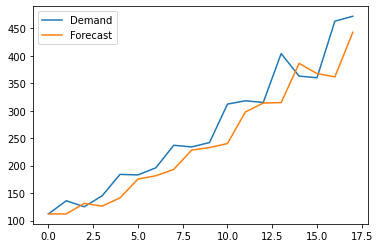

In [142]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

5. For interval of 12 month

In [143]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],12)

In [144]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [145]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  8121.836305596505
Mean of Square Errors for alpha = 0.5 is:  2500.3690481980643
Mean of Square Errors for alpha = 0.8 is:  1228.0100945672884


alpha:  0.8


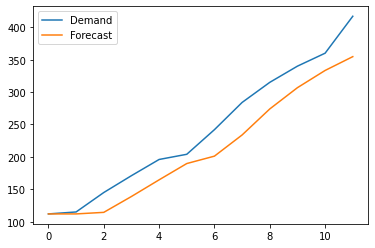

In [146]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])

6. For interval of 24 month

In [147]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],24)

In [148]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

forecast_d3_ses_1=ses(demand,alpha1)
forecast_d3_ses_2=ses(demand,alpha2)
forecast_d3_ses_3=ses(demand,alpha3)

In [149]:
#Calculating Mean of Square Errors
mse_d3_ses_1=mean_squared_error(demand,forecast_d3_ses_1)
mse_d3_ses_2=mean_squared_error(demand,forecast_d3_ses_2)
mse_d3_ses_3=mean_squared_error(demand,forecast_d3_ses_3)

print("Mean of Square Errors for alpha = 0.2 is: ",mse_d3_ses_1)
print("Mean of Square Errors for alpha = 0.5 is: ",mse_d3_ses_2)
print("Mean of Square Errors for alpha = 0.8 is: ",mse_d3_ses_3)

Mean of Square Errors for alpha = 0.2 is:  12309.989044906659
Mean of Square Errors for alpha = 0.5 is:  5839.274088541667
Mean of Square Errors for alpha = 0.8 is:  3114.6575761066665


alpha:  0.8


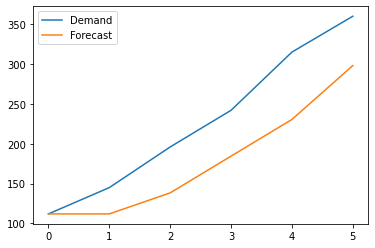

In [150]:
d3_ses_1={'Demand':demand,'Forecast':forecast_d3_ses_1}
d3_ses_2={'Demand':demand,'Forecast':forecast_d3_ses_2}
d3_ses_3={'Demand':demand,'Forecast':forecast_d3_ses_3}

df1=pd.DataFrame(d3_ses_1)
df2=pd.DataFrame(d3_ses_2)
df3=pd.DataFrame(d3_ses_3)

if mse_d3_ses_1<=mse_d3_ses_2 and mse_d3_ses_1<=mse_d3_ses_3:
  print('alpha: ',alpha1)
  df1.plot(style=['-','-'])
elif mse_d3_ses_2<=mse_d3_ses_1 and mse_d3_ses_2<=mse_d3_ses_3:
  print('alpha: ',alpha2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [151]:
from tabulate import tabulate
print(tabulate([['1 month', 1304.1609035809436], ['2 month', 2978.256495465666],['4 month', 1006.344326091061],['8 month', 1688.3774810769578],['12 month', 1228.0100945672884],['24 month', 3114.6575761066665]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |     1304.16 |
+-------------+-------------+
| 2 month     |     2978.26 |
+-------------+-------------+
| 4 month     |     1006.34 |
+-------------+-------------+
| 8 month     |     1688.38 |
+-------------+-------------+
| 12 month    |     1228.01 |
+-------------+-------------+
| 24 month    |     3114.66 |
+-------------+-------------+


Plotting MSE for Constructed Table

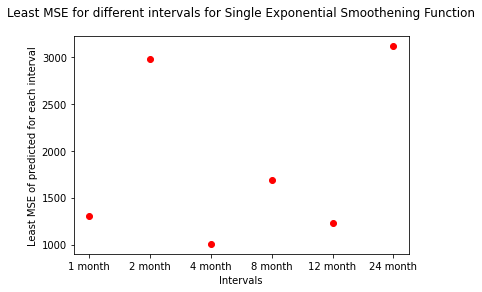

In [152]:
import matplotlib.pyplot as plt
plt.scatter(['1 month','2 month','4 month','8 month','12 month','24 month'], [1304.16 , 2978.26 ,1006.34 ,1688.38 ,1228.01 ,3114.66 ],c='r')
plt.title('Least MSE for different intervals for Single Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---






For Double Exponential Smoothening


1. For interval of 1 month

In [153]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [154]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [155]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  3030.8535477527207
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  2544.721808490218
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  1667.7938756614267


alpha:  0.8
beta:  0.9


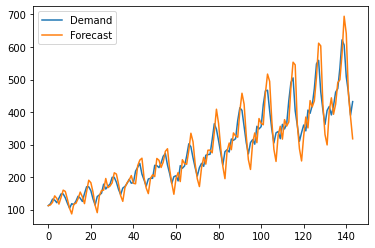

In [156]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

2. For interval of 2 month

In [157]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],2)

In [158]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [159]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  2707.9585065196134
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  4761.5768823241515
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  5821.721575369148


alpha:  0.2
beta:  0.3


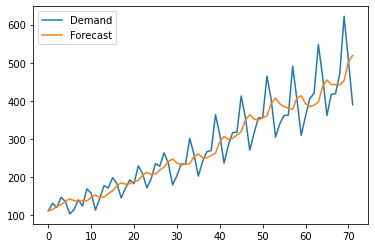

In [160]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

3. For interval of 4 month

In [161]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],4)

In [162]:
4#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [163]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  585.1326589888236
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  810.1580285627945
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  1724.2404585190918


alpha:  0.2
beta:  0.3


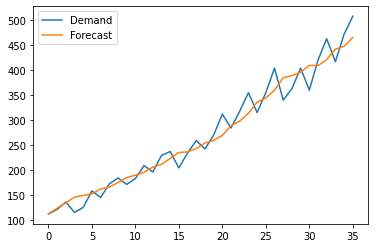

In [164]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

4. For interval of 8 month

In [165]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],8)

In [166]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [167]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  816.1088770802985
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  1078.1467507679472
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  2196.0250055447946


alpha:  0.2
beta:  0.3


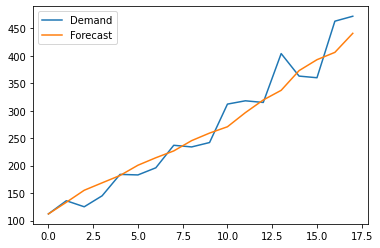

In [168]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

5. For interval of 12 month

In [169]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],12)

In [170]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [171]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  345.17359044752607
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  202.5468582281123
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  294.63348233446555


alpha:  0.5
beta:  0.6


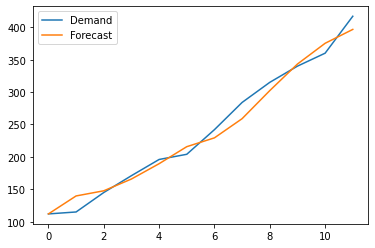

In [172]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot(style=['-','-'])
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])

6. For interval of 24 month

In [173]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],24)

In [174]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

forecast_d3_des_1=des(demand,alpha1,beta1)
forecast_d3_des_2=des(demand,alpha2,beta2)
forecast_d3_des_3=des(demand,alpha3,beta3)

In [175]:
#Calculating Mean of Square Errors
mse_d3_des_1=mean_squared_error(demand,forecast_d3_des_1)
mse_d3_des_2=mean_squared_error(demand,forecast_d3_des_2)
mse_d3_des_3=mean_squared_error(demand,forecast_d3_des_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 is: ",mse_d3_des_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 is: ",mse_d3_des_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 is: ",mse_d3_des_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 is:  151.67853468685516
Mean of Square Errors for alpha = 0.5,beta= 0.6 is:  195.39356022293302
Mean of Square Errors for alpha = 0.8,beta= 0.9 is:  223.54376688653625


alpha:  0.2
beta:  0.3


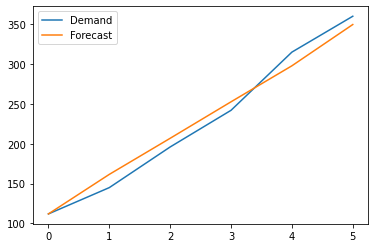

In [176]:
d3_des_1={'Demand':demand,'Forecast':forecast_d3_des_1}
d3_des_2={'Demand':demand,'Forecast':forecast_d3_des_2}
d3_des_3={'Demand':demand,'Forecast':forecast_d3_des_3}

df1=pd.DataFrame(d3_des_1)
df2=pd.DataFrame(d3_des_2)
df3=pd.DataFrame(d3_des_3)

if mse_d3_des_1<=mse_d3_des_2 and mse_d3_des_1<=mse_d3_des_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  df1.plot()
elif mse_d3_des_2<=mse_d3_des_1 and mse_d3_des_2<=mse_d3_des_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  df3.plot(style=['-','-'])



---



Tabulating Intervals and least MSE

In [177]:
from tabulate import tabulate
print(tabulate([['1 month',  1667.7938756614267], ['2 month',  2707.9585065196134],['4 month',  585.1326589888236],['8 month', 816.1088770802985],['12 month', 202.5468582281123],['24 month', 151.67853468685516]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |    1667.79  |
+-------------+-------------+
| 2 month     |    2707.96  |
+-------------+-------------+
| 4 month     |     585.133 |
+-------------+-------------+
| 8 month     |     816.109 |
+-------------+-------------+
| 12 month    |     202.547 |
+-------------+-------------+
| 24 month    |     151.679 |
+-------------+-------------+


Plotting MSE for Constructed Table

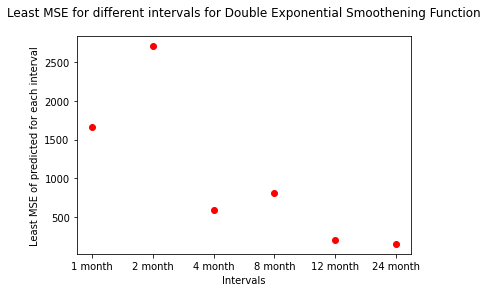

In [178]:
import matplotlib.pyplot as plt
plt.scatter(['1 month','2 month','4 month','8 month','12 month','24 month'], [1667.79 ,2707.96   ,585.133  ,816.109   , 202.547  ,151.679 ],c='r')
plt.title('Least MSE for different intervals for Double Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---



For Triple Exponential Smoothening

1. For interval of 1 month

In [179]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [180]:
#Forecasting
alpha1=0.2
alpha2=0.5
alpha3=0.8

beta1=0.3
beta2=0.6
beta3=0.9

gamma1=0.4
gamma2=0.7
gamma3=0.95

#Considering season of 12 months here

forecast_d3_tes_1=tes(demand,12,alpha1,beta1,gamma1,0)
forecast_d3_tes_2=tes(demand,12,alpha2,beta2,gamma2,0)
forecast_d3_tes_3=tes(demand,12,alpha3,beta3,gamma3,0)

In [181]:
mse_d3_tes_1=mean_squared_error(demand,forecast_d3_tes_1)
mse_d3_tes_2=mean_squared_error(demand,forecast_d3_tes_2)
mse_d3_tes_3=mean_squared_error(demand,forecast_d3_tes_3)

print("Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is: ",mse_d3_tes_1)
print("Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is: ",mse_d3_tes_2)
print("Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is: ",mse_d3_tes_3)

Mean of Square Errors for alpha = 0.2,beta= 0.3 gamma=0.4 is:  118.90281904729369
Mean of Square Errors for alpha = 0.5,beta= 0.6 gamma=0.7 is:  1407.183862202787
Mean of Square Errors for alpha = 0.8,beta= 0.9 gamma=0.95 is:  471.3980990927143


alpha:  0.2
beta:  0.3
gamma:  0.4


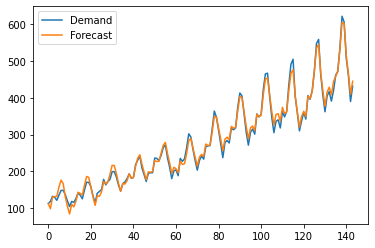

In [182]:
d3_tes_1={'Demand':demand,'Forecast':forecast_d3_tes_1}
d3_tes_2={'Demand':demand,'Forecast':forecast_d3_tes_2}
d3_tes_3={'Demand':demand,'Forecast':forecast_d3_tes_3}

df1=pd.DataFrame(d3_tes_1)
df2=pd.DataFrame(d3_tes_2)
df3=pd.DataFrame(d3_tes_3)

if mse_d3_tes_1<=mse_d3_tes_2 and mse_d3_tes_1<=mse_d3_tes_3:
  print('alpha: ',alpha1)
  print('beta: ',beta1)
  print('gamma: ',gamma1)
  df1.plot(style=['-','-'])
elif mse_d3_tes_2<=mse_d3_tes_1 and mse_d3_tes_2<=mse_d3_tes_3:
  print('alpha: ',alpha2)
  print('beta: ',beta2)
  print('gamma: ',gamma2)
  df2.plot(style=['-','-'])
else:
  print('alpha: ',alpha3)
  print('beta: ',beta3)
  print('gamma: ',gamma3)
  df3.plot(style=['-','-'])

For the intervals 2 months, 4 months, 8 months, 12 months, 24 months and 48 months, the triple exponential smoothening defined by me is not giving output since I have taken the season length to be 12 months. Thus while applying the triple exponential smoothening, the index is going out of bound.


---



Tabulating Intervals and least MSE

In [183]:
from tabulate import tabulate
print(tabulate([['1 month', 118.90281904729369]], headers=['Intervals', 'Least MSE'], tablefmt='grid'))

+-------------+-------------+
| Intervals   |   Least MSE |
+=============+=============+
| 1 month     |     118.903 |
+-------------+-------------+


Plotting MSE for Constructed Table

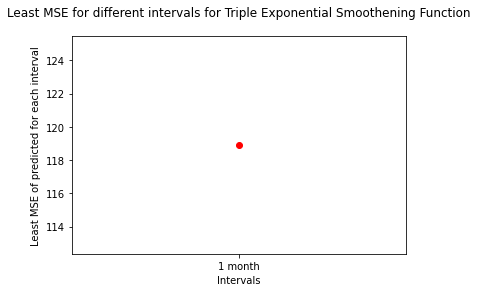

In [184]:
import matplotlib.pyplot as plt
plt.scatter(['1 month'], [118.90281904729369],c='r')
plt.title('Least MSE for different intervals for Triple Exponential Smoothening Function',pad=20)
plt.xlabel('Intervals')
plt.ylabel('Least MSE of predicted for each interval')
plt.show()



---


---

---





Converting to proper date and time format

In [ ]:
data['Month']= pd.to_datetime(data['Month'])
data



---



Calculating Seasonality Index

In [200]:
def s_index(arr,s_len):
  s_index = {}
  s_sum = []
  n_season = (len(arr)//s_len)
  # Calculating total Passenger in each season of 12 months
  for j in range(n_season):
    s_sum.append(sum(arr[s_len*j:s_len*j+s_len]))
    #Calculating seasonality index corresponding to each month
  for i in range(s_len):
    sum_over_avg = 0.0
    for j in range(n_season):
      sum_over_avg += (arr[s_len*j+i])/s_sum[j]
    s_index[i] = sum_over_avg/n_season
  return s_index


In [211]:
s_indexes=s_index(data.iloc[:,1],s_len=12)
print("Seasonality Index for each month are:\n")
s_indexes

Seasonality Index for each month are:



{0: 0.07176116094655523,
 1: 0.07098923031905428,
 2: 0.0816665037416323,
 3: 0.07991386093095403,
 4: 0.08051922848687808,
 5: 0.09188501337994531,
 6: 0.1030300255071956,
 7: 0.1030912872888175,
 8: 0.09006508649349365,
 9: 0.07922942021208379,
 10: 0.069332075926494,
 11: 0.07851710676689629}



---

---

---







Predicting the futuristic 24 months

In [213]:
# Importing the dataset
data_for_prediction = pd.read_csv('D3.csv')

Since MSE is minimum for aplha=0.2, beta=0.3, gamma=0.4, and Triple Exponential Smoothening gives the best result therefore we predict the futuristic 24 months for these parameters and using Triple Exponential Smoothening

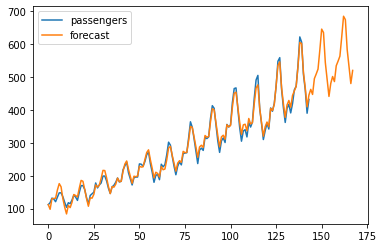

In [214]:
forecast_24_month=tes(data_for_prediction.Passengers,12,alpha1,beta1,gamma1,24)
plt.plot(data_for_prediction.Passengers)
plt.plot(forecast_24_month)
plt.legend(["passengers", "forecast"])
plt.show()



---

---

---







**Forecasting with inbuilt function**

In [185]:
data_for_inbuilt=pd.read_csv('D3.csv')

Forecast for Single Exponential Smoothening

In [186]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data_for_inbuilt['SES']=SimpleExpSmoothing(data_for_inbuilt['Passengers']).fit(smoothing_level=0.8,optimized=False).fittedvalues.shift(0)
data_for_inbuilt

,Month,Passengers,SES
0,1949-01,112,112.000000
1,1949-02,118,112.000000
2,1949-03,132,116.800000
3,1949-04,129,128.960000
4,1949-05,121,128.992000
...,...,...,...
139,1960-08,606,601.917271
140,1960-09,508,605.183454
141,1960-10,461,527.436691
142,1960-11,390,474.287338


Comparing between my implementation and inbuilt function output

In [187]:
#Creating demand list in 'n' intervals
demand=dem_n(data['Passengers'],1)

In [188]:
#Forecasting
alpha=0.8
forecast_d3_ses=ses(demand,alpha)

In [189]:
my_mse=mean_squared_error(demand,forecast_d3_ses)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Passengers'],data_for_inbuilt.SES)

In [190]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  0.0 %


Forecast for Double Exponential Smoothening

In [191]:
from statsmodels.tsa.holtwinters import Holt

data_for_inbuilt['DES'] = Holt(data_for_inbuilt['Passengers']).fit(smoothing_level=0.2, smoothing_slope=0.3).fittedvalues.shift(0)

data_for_inbuilt

,Month,Passengers,SES,DES
0,1949-01,112,112.000000,118.000000
1,1949-02,118,112.000000,122.440000
2,1949-03,132,116.800000,126.925600
3,1949-04,129,128.960000,133.618544
4,1949-05,121,128.992000,138.095787
...,...,...,...,...
139,1960-08,606,601.917271,506.298185
140,1960-09,508,605.183454,546.419387
141,1960-10,461,527.436691,556.611186
142,1960-11,390,474.287338,549.627954


Comparing between my implementation and inbuilt function output

In [192]:
#Forecasting
alpha=0.2
beta=0.3
forecast_d3_des=des(demand,alpha,beta)

In [193]:
my_mse=mean_squared_error(demand,forecast_d3_des)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Passengers'],data_for_inbuilt.DES)

In [194]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  0.18433957671177148 %


Forecast for Triple Exponential Smoothening

In [195]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data_for_inbuilt['TES'] = ExponentialSmoothing(data_for_inbuilt['Passengers']).fit(smoothing_level=0.5, smoothing_slope=0.6,smoothing_seasonal=0.7).fittedvalues.shift(0)
data_for_inbuilt


,Month,Passengers,SES,DES,TES
0,1949-01,112,112.000000,118.000000,118.179040
1,1949-02,118,112.000000,122.440000,115.089520
2,1949-03,132,116.800000,126.925600,116.544760
3,1949-04,129,128.960000,133.618544,124.272380
4,1949-05,121,128.992000,138.095787,126.636190
...,...,...,...,...,...
139,1960-08,606,601.917271,506.298185,558.192821
140,1960-09,508,605.183454,546.419387,582.096411
141,1960-10,461,527.436691,556.611186,545.048205
142,1960-11,390,474.287338,549.627954,503.024103


Comparing between my implementation and inbuilt function output

In [196]:
#Forecasting
alpha=0.5
beta=0.6
gamma=0.7
forecast_d3_tes=tes(demand,12,alpha,beta,gamma,0)

In [197]:
my_mse=mean_squared_error(demand,forecast_d3_tes)
inbuilt_mse=mean_squared_error(data_for_inbuilt['Passengers'],data_for_inbuilt.TES)

In [198]:
#Calculating error between my implementation and inbuilt function
error=(inbuilt_mse-my_mse)/inbuilt_mse*100
print("Precentage error between my implementation and inbuilt function output is: ",error,"%")

Precentage error between my implementation and inbuilt function output is:  18.635327511084355 %
